In [1]:
from __future__ import annotations
import os

os.chdir("..")

from src.nanograd.value import Value
from src.nanograd.nn import MLP

# Basic example

This is how you can create and manipulate values. Values accept floats or ints as data and can be assigned a label.

Let's calculate a simple expression: $e = a * b + d$, where $a = 2$, $b =  4$, $d = 3$.

In [2]:
a = Value(2.0, label="a")
b = Value(4.0, label="b")
c = a * b
c.label = "c"
d = Value(3.0, label="d")
e = c + d
e.label = "e"
e

Value(data=11.0)

We can call `e.backward()` to perform backpropagation and compute derivatives of $e$ with respect to all the other variables: $a$, $b$ and $d$.

In [3]:
e.backward()
b.grad

2.0

Optionally, if you install [Graphviz](https://graphviz.org/download/), you can visualize the computation graph.

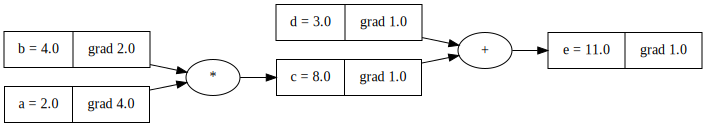

In [4]:
e.visualize()

Consider a more complex example. Let's perform a dot product of vectors $\bold x = \begin{bmatrix}2.0 & 0.0\end{bmatrix}$ and $\bold w = \begin{bmatrix}-3.0 & 1.0\end{bmatrix}$ and add scalar $b = 6.8813735870195432$ to the result :)

First, let's define the data.

In [5]:
# Define inputs x1, x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# Define weights w1,w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# Define bias of the neuron
b = Value(6.8813735870195432, label="b")

Next, let's perform dot product of vectors $\bold x$ and $\bold w$. We'll also add $b$ to the result. Dot product of vectors $\bold x$ and $\bold w$ is $n = \bold x \cdot \bold w + b = x_1w_1 + x_2w_2 + b$

In [6]:
x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b
n.label = "n"

Let's also apply activation function! There are 6 activation functions avaialbe right now: `.linear()`, `.tanh()`, `.log()`, `.sigmoid()`, `.relu()` and `.exp()`.

In [7]:
o = n.tanh()
o.label = "o"

Find derivatives of $o$ by calling `o.backward()`.

In [8]:
o.backward()

You can now visualize the results.

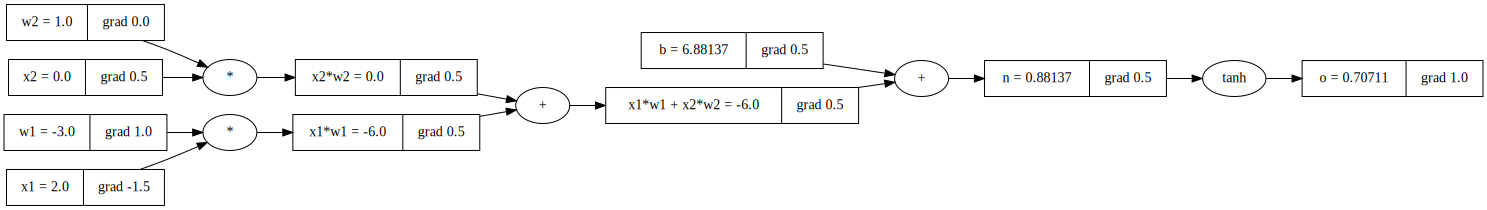

In [9]:
o.visualize()

# Neural Network example
Let's train a simple MLP. Our inputs are vectors of 3 features and output is a single number eigher $1.0$ or $-1.0$. We have 4 examples in total.

In [10]:
# Data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]  # desired targets

Let's define multi-layer perceptron with 3 inputs, 2 hidden layers with 4 neurons each, and 1 output layer with 1 neuron and tanh activation function. Play with the network configuration and see which works best! 

In [11]:
n = MLP(3, [4, 4, 1], "tanh")

Let's train our neural network for 20 epochs with learning rate 0.1. Play with the hyperparameters to see which works best!

In [12]:
EPOCHS = 20
alpha = 0.1
for k in range(EPOCHS):
    # generate predictions
    ypred = [n(xs[i], i) for i in range(len(xs))]
    # calculate loss as MSE
    loss = sum(((ygt - yout) ** 2 for ygt, yout in zip(ys, ypred)))
    print(f"Current loss: {loss.data}")
    params = n.parameters()

    # reset gradients
    for p in params:
        p.grad = 0.0

    # perform backpropagation
    loss.backward()

    # update parameters
    for p in params:
        p.data -= alpha * p.grad

Current loss: 5.014719213337422
Current loss: 0.1838532922860856
Current loss: 0.09180964625980023
Current loss: 0.013401466030212892
Current loss: 0.011527673646856446
Current loss: 0.01017483904031616
Current loss: 0.009142608852720203
Current loss: 0.008324348533524404
Current loss: 0.007657212326390792
Current loss: 0.007101392826606472
Current loss: 0.006630276552392946
Current loss: 0.006225305826725749
Current loss: 0.005873095134151973
Current loss: 0.005563717300042256
Current loss: 0.0052896364292977175
Current loss: 0.00504501739972305
Current loss: 0.004825264239973507
Current loss: 0.004626702799482877
Current loss: 0.004446357275005488
Current loss: 0.00428178947036461


We can visualize the computation graph of the neural network now!

In [13]:
loss.visualize()